In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [2]:
df_loan=pd.read_csv('loan_borowwer_data.csv')

In [3]:
df_loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df_loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
df_loan.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [9]:
df_loan['not.fully.paid'].unique()

array([0, 1], dtype=int64)

In [11]:
df_loan['credit.policy'].unique()

array([1, 0], dtype=int64)

In [12]:
df_loan.shape

(9578, 14)

<AxesSubplot:>

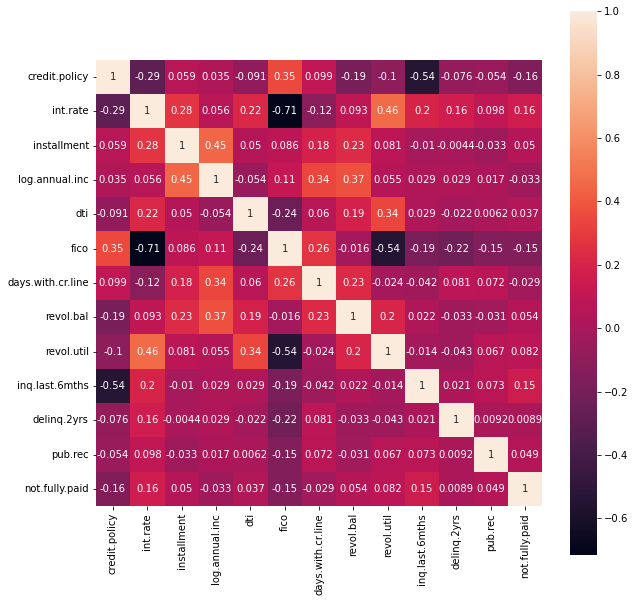

In [15]:
correlation=df_loan.corr()
plot.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True, square=True)

In [24]:
df_loan['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<AxesSubplot:>

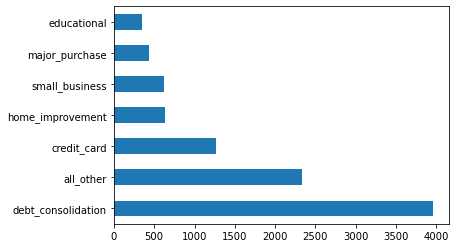

In [35]:
df_loan['purpose'].value_counts().plot(kind='barh')

In [36]:
df_debt=df_loan.groupby('purpose').get_group('debt_consolidation')
df_debt

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9562,0,debt_consolidation,0.1348,508.87,10.933107,17.76,717,3870.041667,8760,28.2,6,0,0,0
9563,0,debt_consolidation,0.1099,556.50,11.225243,17.84,727,6840.041667,18753,29.0,4,0,0,1
9572,0,debt_consolidation,0.1565,69.98,10.110472,7.02,662,8190.041667,2999,39.5,6,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1


In [38]:
df_debt.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000,3957.000000
mean,0.814506,0.126595,358.984390,10.912909,14.076462,703.871367,4533.037139,17146.710639,54.125504,1.461461,0.163255,0.070508,0.152388
std,0.388747,0.024769,198.309002,0.547477,6.433460,34.397778,2340.567954,24167.207708,26.715131,2.059245,0.561788,0.262854,0.359442
min,0.000000,0.060000,23.210000,7.547502,0.000000,612.000000,180.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.111400,201.520000,10.571317,9.200000,677.000000,2925.000000,5494.000000,33.200000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.128000,325.080000,10.903815,14.240000,697.000000,4114.041667,10868.000000,55.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,491.300000,11.238436,19.130000,727.000000,5639.958333,19469.000000,76.300000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.212100,940.140000,14.528354,29.960000,822.000000,16259.041670,290341.000000,119.000000,33.000000,13.000000,3.000000,1.000000


<AxesSubplot:>

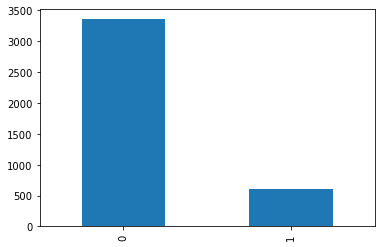

In [40]:
df_debt['not.fully.paid'].value_counts().plot(kind='bar')

<AxesSubplot:>

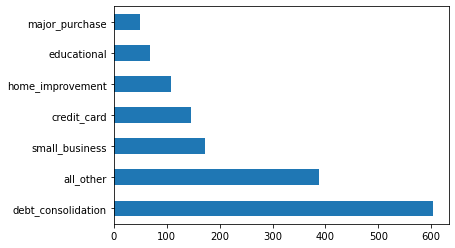

In [42]:
df_paid=df_loan.groupby('not.fully.paid').get_group(1)
df_paid['purpose'].value_counts().plot(kind='barh')

### as  we can see, installment and log annual income are correlated

In [43]:
features= df_loan.drop(['not.fully.paid','purpose'],axis=1)
target=df_loan['not.fully.paid']

In [44]:
features.shape

(9578, 12)

In [45]:
target.shape

(9578,)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=1)

In [47]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('accuracy score:', metrics.accuracy_score(y_test,y_pred_dt))

accuracy score: 0.7427974947807933


In [50]:
random=RandomForestClassifier(criterion='entropy')
random.fit(x_train,y_train)
y_pred_rand=random.predict(x_test)
print('accuracy score:', metrics.accuracy_score(y_test,y_pred_rand))

accuracy score: 0.8292275574112735


In [57]:
print(y_test.head(15))
print(y_pred_rand[0:14])

8261    0
3431    1
5482    1
3272    1
4687    0
5718    0
4661    0
8710    0
8811    0
7267    0
5803    0
9075    0
4729    0
2975    0
7800    1
Name: not.fully.paid, dtype: int64
[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
